In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import os

In [3]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: BCE1-4BD5

 C:\Users\admin\파이썬_머신러닝_완벽가이드 디렉터리

2023-08-02  오후 02:56    <DIR>          .
2023-08-02  오후 02:56    <DIR>          ..
2023-08-02  오후 01:58    <DIR>          .ipynb_checkpoints
2023-07-26  오전 11:35            21,539 1. 넘파이.ipynb
2023-07-28  오후 01:05           164,621 2. 사이킷런으로 시작하는 머신러닝.ipynb
2023-07-28  오후 05:40           220,861 3.  평가.ipynb
2023-08-01  오후 05:46           736,054 4.  분류.ipynb
2023-08-02  오후 01:01           443,867 5. 회귀.ipynb
2020-03-10  오후 01:20           211,884 Bank_Personal_Loan_Modelling.csv
2019-09-20  오전 12:04       150,828,752 creditcard.csv
2019-09-20  오전 12:05        69,155,672 creditcardfraud.zip
2020-03-10  오후 01:20            62,016 personal-loan-modeling.zip
2023-08-01  오후 01:44             6,400 tree.dot
2023-08-02  오후 02:33         1,777,830 [실습] 개인 대출 모델링.ipynb
2023-08-01  오전 10:40           174,780 [실습] 캐글 신용카드 사기 검출.ipynb
2023-08-02  오후 02:56           225,732 [황태언] 수요예측.ipynb
              13개 파일     

In [4]:
# pd.read_csv()로 csv파일 읽어들이기
bike_df = pd.read_csv('C:/sample_data/bike_train.csv')

In [5]:
print(bike_df.shape)
bike_df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
bike_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
bike_df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

## 데이터 EDM 및 해석

<Axes: xlabel='season', ylabel='count'>

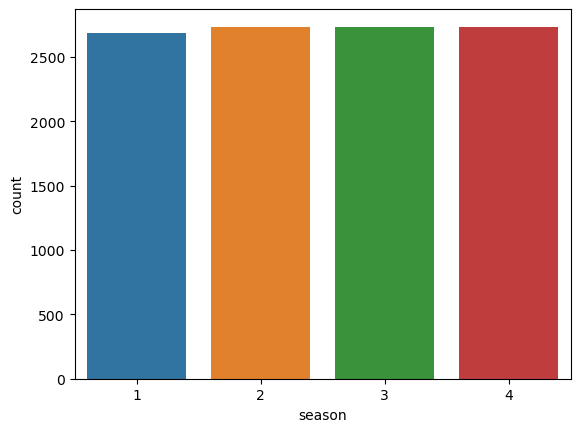

In [10]:
# 날씨에 따른 데이터 (1: 봄, 2: 여름, 3: 가을, 4: 겨울)
sns.countplot(x='season', data=bike_df)

In [11]:
bike_df.groupby(['season']).count()['count']

season
1    2686
2    2733
3    2733
4    2734
Name: count, dtype: int64

<Axes: xlabel='holiday', ylabel='count'>

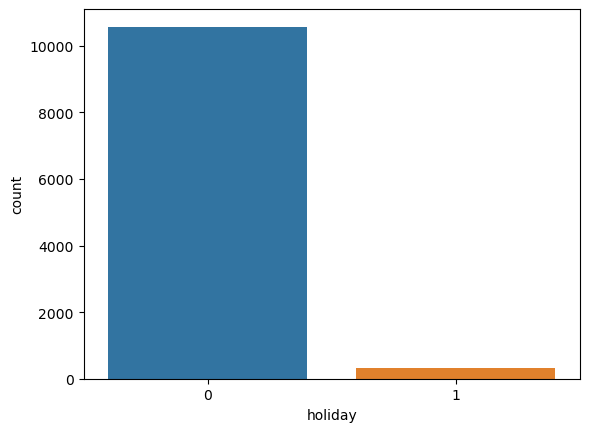

In [12]:
# 휴일에 따른 데이터 (1: 토,일요일의 주말을 제외한 국경일 등 휴일, 0: 휴일이 아닌 날)
sns.countplot(x='holiday', data=bike_df)

In [13]:
bike_df.groupby(['holiday']).count()['count']

holiday
0    10575
1      311
Name: count, dtype: int64

<Axes: xlabel='workingday', ylabel='count'>

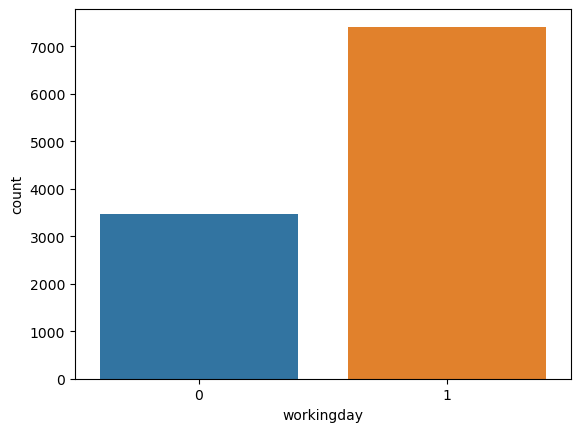

In [14]:
# 평일에 따른 데이터 (1: 토,일요일의 주말 및 휴일이 아닌 주중, 0: 주말 및 휴일)
sns.countplot(x='workingday', data=bike_df)

In [15]:
bike_df.groupby(['workingday']).count()['count']

workingday
0    3474
1    7412
Name: count, dtype: int64

<Axes: xlabel='weather', ylabel='count'>

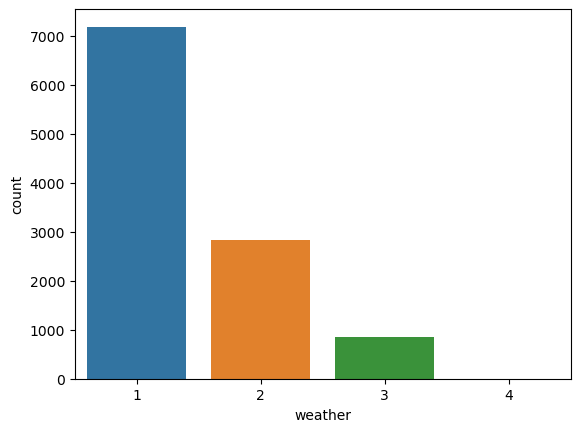

In [16]:
# 날씨에 따른 데이터 
# 1: 맑음, 약간 구름 낀 흐림, 2: 안개, 안개+흐림, 3: 가벼운 눈, 가벼운 비+천둥, 4: 심한 눈/비, 천둥/번개
sns.countplot(x='weather', data=bike_df)

In [17]:
bike_df.groupby(['weather']).count()['count']

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, '0.82'),
  Text(1, 0, '1.64'),
  Text(2, 0, '2.46'),
  Text(3, 0, '3.28'),
  Text(4, 0, '4.1'),
  Text(5, 0, '4.92'),
  Text(6, 0, '5.74'),
  Text(7, 0, '6.56'),
  Text(8, 0, '7.38'),
  Text(9, 0, '8.2'),
  Text(10, 0, '9.02'),
  Text(11, 0, '9.84'),
  Text(12, 0, '10.66'),
  Text(13, 0, '11.48'),
  Text(14, 0, '12.3'),
  Text(15, 0, '13.12'),
  Text(16, 0, '13.94'),
  Text(17, 0, '14.76'),
  Text(18, 0, '15.58'),
  Text(19, 0, '16.4'),
  Text(20, 0, '17.22'),
  Text(21, 0, '18.04'),
  Text(22, 0, '18.86'),
  Text(23, 0, '19.68'),
  Text(24, 0, '20.5'),
  Text(25, 0, '21.32'),
  Text(26, 0, '22.14'),
  Text(27, 0, '22.96'),
  Text(28, 0, '23.78'),
  Text(29, 0, '24.6'),
  Text(30, 0, '25.42'),
  Text(31, 0, '26.24'),
  Text(32, 0, '27.06'),
  Text(33, 0, 

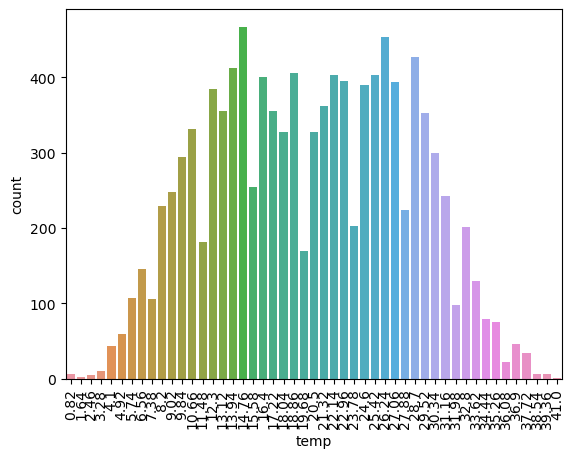

In [18]:
# 온도(섭씨에 따른 데이터)
sns.countplot(x='temp', data=bike_df)
# x축 눈금 라벨 회전하기 
plt.xticks(rotation=90)

In [19]:
bike_df.groupby(['temp']).count()['count']

temp
0.82       7
1.64       2
2.46       5
3.28      11
4.10      44
4.92      60
5.74     107
6.56     146
7.38     106
8.20     229
9.02     248
9.84     294
10.66    332
11.48    181
12.30    385
13.12    356
13.94    413
14.76    467
15.58    255
16.40    400
17.22    356
18.04    328
18.86    406
19.68    170
20.50    327
21.32    362
22.14    403
22.96    395
23.78    203
24.60    390
25.42    403
26.24    453
27.06    394
27.88    224
28.70    427
29.52    353
30.34    299
31.16    242
31.98     98
32.80    202
33.62    130
34.44     80
35.26     76
36.08     23
36.90     46
37.72     34
38.54      7
39.36      6
41.00      1
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 [Text(0, 0, '0.76'),
  Text(1, 0, '1.515'),
  Text(2, 0, '2.275'),
  Text(3, 0, '3.03'),
  Text(4, 0, '3.79'),
  Text(5, 0, '4.545'),
  Text(6, 0, '5.305'),
  Text(7, 0, '6.06'),
  Text(8, 0, '6.82'),
  Text(9, 0, '7.575'),
  Text(10, 0, '8.335'),
  Text(11, 0, '9.09'),
  Text(12, 0, '9.85'),
  Text(13, 0, '10.605'),
  Text(14, 0, '11.365'),
  Text(15, 0, '12.12'),
  Text(16, 0, '12.88'),
  Text(17, 0, '13.635'),
  Text(18, 0, '14.395'),
  Text(19, 0, '15.15'),
  Text(20, 0, '15.91'),
  Text(21, 0, '16.665'),
  Text(22, 0, '17.425'),
  Text(23, 0, '18.18'),
  Text(24, 0, '18.94'),
  Text(25, 0, '19.695'),
  Text(26, 0, '20.455'),
  Text(27, 0, '21.21'),
  Text(28, 0, '21.97'),
  Text(29, 0, '22.725'),
  Text(30, 0, 

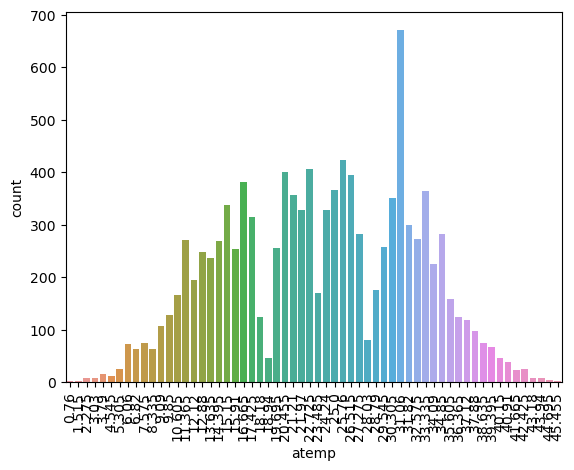

In [20]:
# 체감온도(섭씨)에 따른 데이터
sns.countplot(x='atemp', data=bike_df)
# x축 눈금 라벨 회전하기 
plt.xticks(rotation=90)

In [21]:
bike_df.groupby(['atemp']).count()['count']

atemp
0.760       2
1.515       1
2.275       7
3.030       7
3.790      16
4.545      11
5.305      25
6.060      73
6.820      63
7.575      75
8.335      63
9.090     107
9.850     127
10.605    166
11.365    271
12.120    195
12.880    247
13.635    237
14.395    269
15.150    338
15.910    254
16.665    381
17.425    314
18.180    123
18.940     45
19.695    255
20.455    400
21.210    356
21.970    328
22.725    406
23.485    170
24.240    327
25.000    365
25.760    423
26.515    395
27.275    282
28.030     80
28.790    175
29.545    257
30.305    350
31.060    671
31.820    299
32.575    272
33.335    364
34.090    224
34.850    283
35.605    159
36.365    123
37.120    118
37.880     97
38.635     74
39.395     67
40.150     45
40.910     39
41.665     23
42.425     24
43.180      7
43.940      7
44.695      3
45.455      1
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]),
 [Text(0, 0, '0'),
  Text(1, 0, '8'),
  Text(2, 0, '10'),
  Text(3, 0, '12'),
  Text(4, 0, '13'),
  Text(5, 0, '14'),
  Text(6, 0, '15'),
  Text(7, 0, '16'),
  Text(8, 0, '17'),
  Text(9, 0, '18'),
  Text(10, 0, '19'),
  Text(11, 0, '20'),
  Text(12, 0, '21'),
  Text(13, 0, '22'),
  Text(14, 0, '23'),
  Text(15, 0, '24'),
  Text(16, 0, '25'),
  Text(17, 0, '26'),
  Text(18, 0, '27'),
  Text(19, 0, '28'),
  Text(20, 0, '29'),
  Text(21, 0, '30'),
  Text(22, 0, '31'),
  Text(23, 0, '32'),
  Text(24, 0, '33'),
  Text(25, 0, '34'),
  Text(26, 0, '35'),
  Text(27, 0, '36'),
  Text(28, 0, '37'

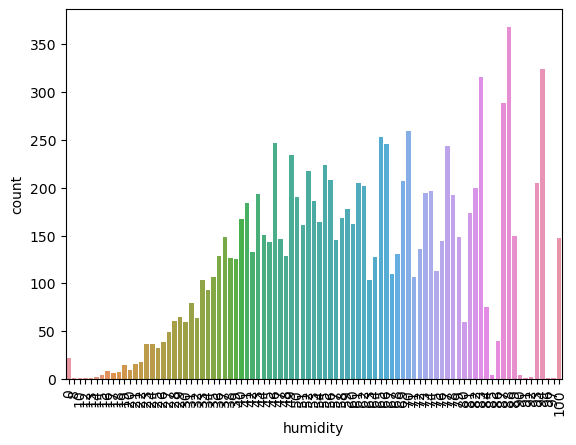

In [22]:
# 상대습도에 따른 데이터 
sns.countplot(x='humidity', data=bike_df)
# x축 눈금 라벨 회전하기 
plt.xticks(rotation=90)

In [23]:
bike_df.groupby(['humidity']).count()['count']

humidity
0       22
8        1
10       1
12       1
13       1
      ... 
93     205
94     324
96       1
97       1
100    148
Name: count, Length: 89, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '6.0032'),
  Text(2, 0, '7.0015'),
  Text(3, 0, '8.9981'),
  Text(4, 0, '11.0014'),
  Text(5, 0, '12.998'),
  Text(6, 0, '15.0013'),
  Text(7, 0, '16.9979'),
  Text(8, 0, '19.0012'),
  Text(9, 0, '19.9995'),
  Text(10, 0, '22.0028'),
  Text(11, 0, '23.9994'),
  Text(12, 0, '26.0027'),
  Text(13, 0, '27.9993'),
  Text(14, 0, '30.0026'),
  Text(15, 0, '31.0009'),
  Text(16, 0, '32.9975'),
  Text(17, 0, '35.0008'),
  Text(18, 0, '36.9974'),
  Text(19, 0, '39.0007'),
  Text(20, 0, '40.9973'),
  Text(21, 0, '43.0006'),
  Text(22, 0, '43.9989'),
  Text(23, 0, '46.0022'),
  Text(24, 0, '47.9988'),
  Text(25, 0, '50.0021'),
  Text(26, 0, '51.9987'),
  Text(27, 0, '56.9969')])

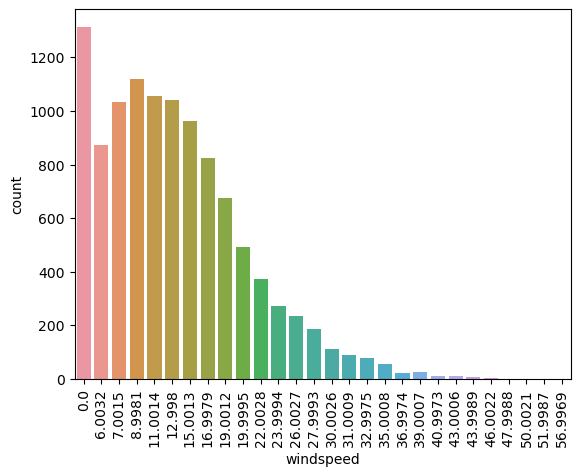

In [24]:
# 풍속에 따른 데이터
sns.countplot(x='windspeed', data=bike_df)
# x축 눈금 라벨 회전하기 
plt.xticks(rotation=90)

In [25]:
bike_df.groupby(['windspeed']).count()['count']

windspeed
0.0000     1313
6.0032      872
7.0015     1034
8.9981     1120
11.0014    1057
12.9980    1042
15.0013     961
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
36.9974      22
39.0007      27
40.9973      11
43.0006      12
43.9989       8
46.0022       3
47.9988       2
50.0021       1
51.9987       1
56.9969       2
Name: count, dtype: int64

<Axes: xlabel='casual', ylabel='Count'>

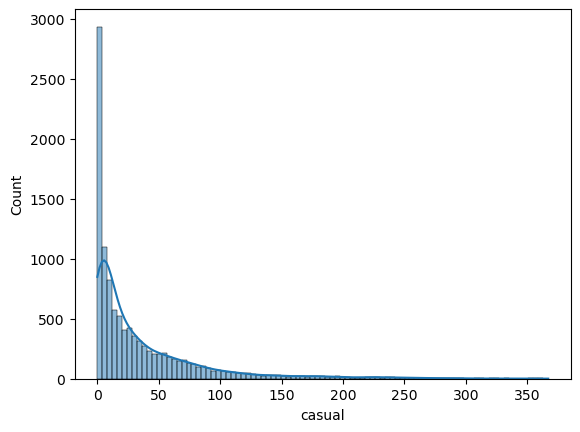

In [26]:
# 사전에 등록되지 않은 사용자가 대여한 횟수 
sns.histplot(x='casual', data=bike_df, kde='True')

In [27]:
bike_df.groupby(['casual']).count()['count']

casual
0      986
1      667
2      487
3      438
4      354
      ... 
356      1
357      1
361      1
362      1
367      1
Name: count, Length: 309, dtype: int64

<Axes: xlabel='registered', ylabel='Count'>

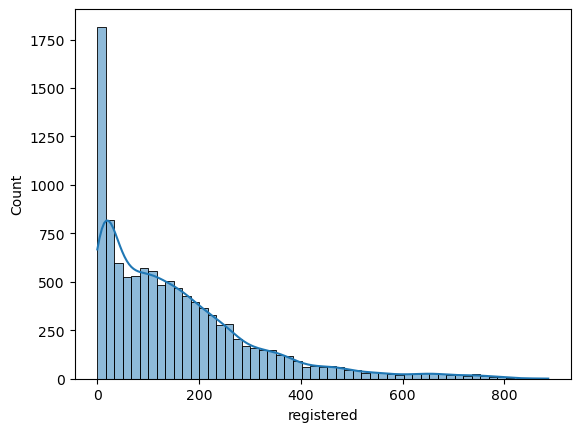

In [28]:
# 사전에 등록된 사용자가 대여한 횟수 
sns.histplot(x='registered', data=bike_df, kde='True')

In [29]:
bike_df.groupby(['registered']).count()['count']

registered
0       15
1      135
2      150
3      195
4      190
      ... 
812      2
833      1
839      1
857      2
886      1
Name: count, Length: 731, dtype: int64

In [30]:
# 문자열을 datetime 타입으로 변경.
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x : x.hour)
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


## 데이터 전처리

In [31]:
drop_columns = ['datetime', 'casual', 'registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [32]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


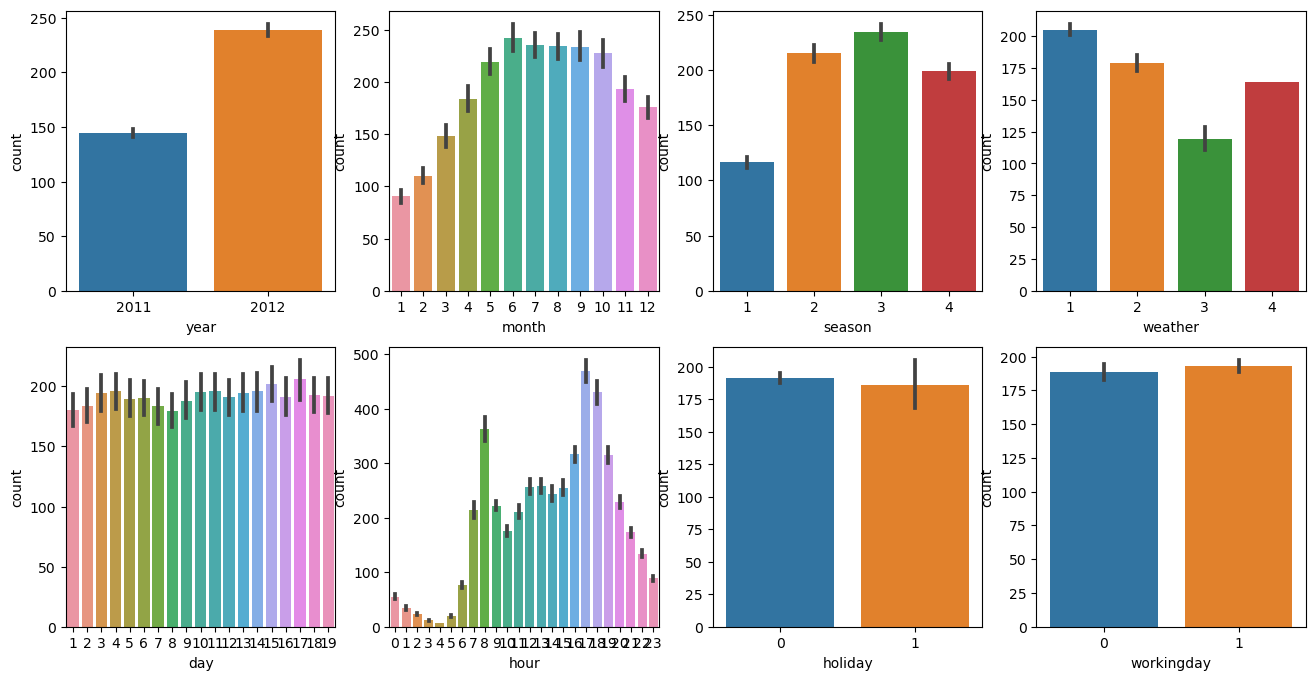

In [33]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
cat_features = ['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    # 시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='count', data=bike_df, ax=axs[row][col])

## 선형회귀, 릿지, 라소 회귀 트리모델 3개 이상 사용 후 결과 비교 (6개)

#### 선형회귀 

In [51]:
# 선형회귀
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bike_df['count']
X_data = bike_df.drop(['count'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE: {0: .3f}, RMSE: {1: .3F}'.format(mse, rmse))
print('Variance score: {0: .3f}'.format(r2_score(y_test, y_preds)))

MSE:  18756.458, RMSE:  136.954
Variance score:  0.417


In [35]:
print('절편 값: ', lr.intercept_)
print('회귀 계수값: ', np.round(lr.coef_, 1))

절편 값:  -171413.30354858033
회귀 계수값:  [-5.7 -1.2  4.5 -4.5  1.5  4.6 -2.   0.5 85.2  9.5  0.5  7.7]


In [36]:
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

year          85.2
month          9.5
hour           7.7
atemp          4.6
workingday     4.5
temp           1.5
windspeed      0.5
day            0.5
holiday       -1.2
humidity      -2.0
weather       -4.5
season        -5.7
dtype: float64

In [37]:
from sklearn.model_selection import cross_val_score

y_target = bike_df['count']
X_data = bike_df.drop(['count'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5 폴드 세트로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0: .3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-10637.64 -14746.03 -13481.62 -32888.9  -33840.74]
 5 folds 의 개별 RMSE scores:  [103.14 121.43 116.11 181.35 183.96]
 5 folds 의 평균 RMSE :  141.199


#### 릿지 회귀 

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha=10으로 설정해 릿지 회귀 수행.
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE : {0: .3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-10613.634 -14761.903 -13470.407 -32888.907 -33848.89 ]
 5 folds 의 개별 RMSE scores:  [103.022 121.499 116.062 181.353 183.981]
 5 folds 의 평균 RMSE :  141.183


In [40]:
# 릿지에 사용된 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 떄 5 folds의 평균 RMSE : {1: .3f}'.format(alpha, avg_rmse))

alpha 0 일 떄 5 folds의 평균 RMSE :  141.199
alpha 0.1 일 떄 5 folds의 평균 RMSE :  141.199
alpha 1 일 떄 5 folds의 평균 RMSE :  141.197
alpha 10 일 떄 5 folds의 평균 RMSE :  141.183
alpha 100 일 떄 5 folds의 평균 RMSE :  141.113


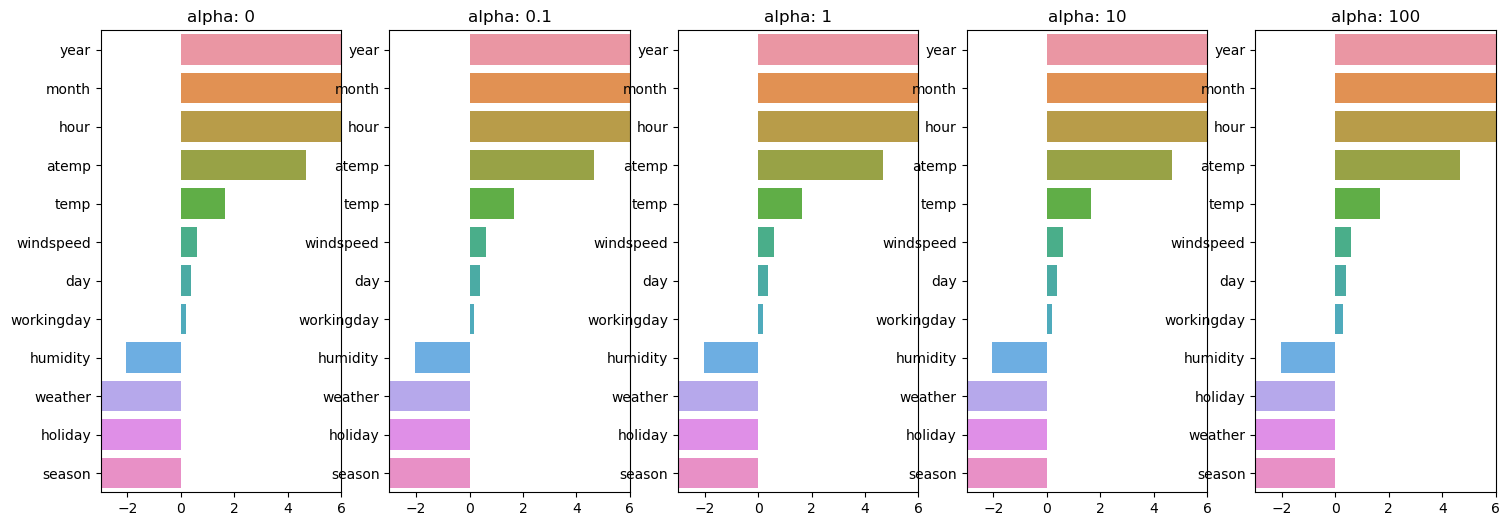

In [41]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig, axs =plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 치러별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname='alpha: '+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff =coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
# for문 바깥에서 맷플롯립의 show 호출 및 alpha예 따른 피처별 회귀 계수를 DataFrame으로 표시 
plt.show()

In [42]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha: '+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
year,82.762360,82.759269,82.731458,82.454395,79.783624
month,9.933357,9.932953,9.929322,9.893387,9.569745
hour,7.778084,7.778073,7.777982,7.777073,7.768221
atemp,4.674261,4.674251,4.674162,4.673243,4.662384
temp,1.647560,1.647582,1.647782,1.649803,1.671588
windspeed,0.604918,0.604907,0.604811,0.603853,0.594624
day,0.377886,0.377888,0.377900,0.378018,0.378986
workingday,0.172994,0.173150,0.174552,0.187985,0.279257
humidity,-2.037791,-2.037802,-2.037895,-2.038824,-2.047794
weather,-4.889093,-4.888871,-4.886873,-4.866973,-4.675761


#### 라쏘 회귀

In [43]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose: print('#######', model_name, '#######')
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                         y_target_n, scoring='neg_mean_squared_error', cv=5)
        
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1: .3f}'.format(param, avg_rmse))
        # cross_val_score는 evalution metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
                               
        model.fit(X_data_n, y_target_n)
        if return_coeff:
                # alpha 에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
                coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
                colname = 'alpha: '+str(param)
                coeff_df[colname] = coeff
                               
    return coeff_df
# end of get_linear_regre_eval
# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE:  141.151
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:  141.131
alpha 0.5일 때 5 폴드 세트의 평균 RMSE:  140.935
alpha 1일 때 5 폴드 세트의 평균 RMSE:  140.793
alpha 3일 때 5 폴드 세트의 평균 RMSE:  141.204


In [44]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha: '+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
year,82.460266,82.330912,80.664294,78.582238,70.426731
month,9.567585,9.410145,7.465517,7.436050,7.265724
hour,7.774883,7.773516,7.755293,7.728048,7.660627
atemp,4.612258,4.587331,4.472330,4.508081,4.567298
temp,1.716512,1.744232,1.871853,1.841917,1.804861
windspeed,0.598370,0.595621,0.569347,0.539927,0.470243
day,0.376875,0.376444,0.366082,0.351681,0.289935
workingday,0.044960,0.000000,0.000000,0.000000,0.000000
humidity,-2.041188,-2.042644,-2.062370,-2.092418,-2.136485
holiday,-3.737879,-2.778326,-0.000000,-0.000000,-0.000000


#### 엘라스틱넷 회귀 

In [46]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                       X_data_n=X_data, y_target_n=y_target)

####### ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE:  141.121
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:  141.199
alpha 0.5일 때 5 폴드 세트의 평균 RMSE:  143.947
alpha 1일 때 5 폴드 세트의 평균 RMSE:  147.075
alpha 3일 때 5 폴드 세트의 평균 RMSE:  152.313


In [47]:
# 반환된 coeff_elastic_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrme 출력
sort_column = 'alpha: ' +str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
year,76.063148,73.505706,50.527107,36.006948,15.939725
month,8.998879,8.712603,7.361517,7.231478,6.739223
hour,7.754085,7.744610,7.650398,7.576109,7.409267
atemp,4.598196,4.564550,4.342299,4.257285,4.039669
temp,1.756034,1.802787,2.138179,2.293492,2.624350
windspeed,0.577985,0.567567,0.474556,0.413379,0.315748
day,0.378940,0.378978,0.373520,0.363186,0.315417
workingday,0.197519,0.146015,0.000000,0.000000,0.000000
humidity,-2.061932,-2.071224,-2.155827,-2.208708,-2.259886
holiday,-2.539385,-1.830102,-0.000000,-0.000000,-0.000000


## 하이퍼 파라미터 튜닝을 활용하여 결과 비교 

In [65]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler

# method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 떄 적용. p_degree는 2 이상 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,
                                         include_bias=False).fit_transform(scaled_data)
        
    return scaled_data

In [66]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출.
alphas =[0.1, 1, 10, 100]

# 5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분표, 표준정규 분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods = [(None, None), ('Standard', None), ('Standard', 2),
                 ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1],
                                    input_data=X_data)
    print('\n 변환 유형: {0}, Polynomial Degree: {1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                        y_target_n=y_target, verbose=False, return_coeff=False)


 변환 유형: None, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:  141.199
alpha 1일 때 5 폴드 세트의 평균 RMSE:  141.197
alpha 10일 때 5 폴드 세트의 평균 RMSE:  141.183
alpha 100일 때 5 폴드 세트의 평균 RMSE:  141.113

 변환 유형: Standard, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:  141.198
alpha 1일 때 5 폴드 세트의 평균 RMSE:  141.194
alpha 10일 때 5 폴드 세트의 평균 RMSE:  141.151
alpha 100일 때 5 폴드 세트의 평균 RMSE:  140.903

 변환 유형: Standard, Polynomial Degree: 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:  133.661
alpha 1일 때 5 폴드 세트의 평균 RMSE:  133.517
alpha 10일 때 5 폴드 세트의 평균 RMSE:  133.648
alpha 100일 때 5 폴드 세트의 평균 RMSE:  134.021

 변환 유형: MinMax, Polynomial Degree: None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:  141.189
alpha 1일 때 5 폴드 세트의 평균 RMSE:  141.123
alpha 10일 때 5 폴드 세트의 평균 RMSE:  140.785
alpha 100일 때 5 폴드 세트의 평균 RMSE:  139.685

 변환 유형: MinMax, Polynomial Degree: 2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE:  133.502
alpha 1일 때 5 폴드 세트의 평균 RMSE:  131.551
alpha 10일 때 5 폴드 세트의 평균 RMSE:  127.211
alpha 100일 때 5 폴드 세트의 평균 RMSE:  129.699

 변환 유형: Log, 

## 특성중요도 시각화

In [80]:
import numpy as np

def get_model_cv_predicition(model, X_data, y_target):
    neg_mse_scores=cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#### ', model.__class__.__name__, '####')
    print('5 교차 검증의 평균 RMSE: {0: .3f}'.format(avg_rmse))

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

y_target = bike_df['count']
X_data = bike_df.drop(['count'], axis=1, inplace=False)

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_predicition(model, X_data, y_target)

####  DecisionTreeRegressor ####
5 교차 검증의 평균 RMSE:  139.031
####  RandomForestRegressor ####
5 교차 검증의 평균 RMSE:  74.001
####  GradientBoostingRegressor ####
5 교차 검증의 평균 RMSE:  68.113
####  XGBRegressor ####
5 교차 검증의 평균 RMSE:  70.057
####  LGBMRegressor ####
5 교차 검증의 평균 RMSE:  66.653


<Axes: >

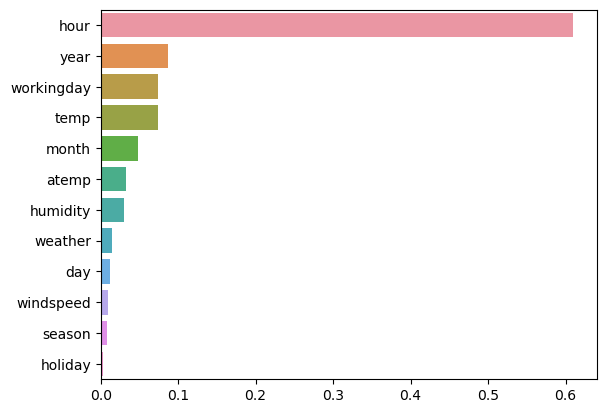

In [101]:
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습합니다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

In [98]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

y_target_log = np.log1p(y_target)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target_log, 
                                                    test_size = 0.3, random_state = 0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

<Axes: >

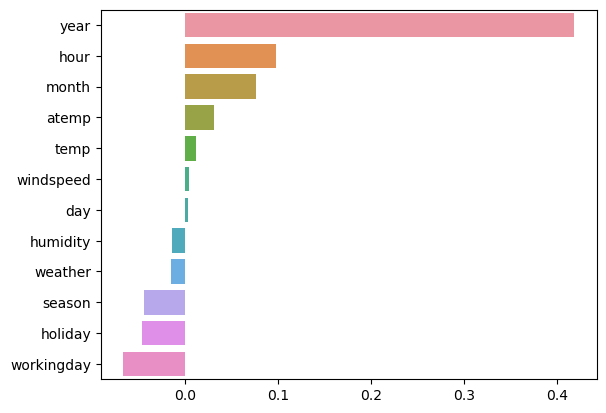

In [100]:
coef = pd.Series(lr_reg.coef_, index = X_data.columns)
coef_sort = coef.sort_values(ascending = False)
sns.barplot(x = coef_sort.values, y = coef_sort.index)